# Support Vector Machine (SVM)

SVM is very similar to logistic regression (LR). The difference between SVM and LR is the cost function. LR tries to minimize the logistic loss based on the the sigmoid function, while SVM uses the **hinge loss** based on the a "step shaped" function, that is g(z) = 0 if z<0 and 1 otherwise. 

The SVM tends to return a model with large "margin".

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification,make_moons

Recall that the loss function of logistic regression is $-ylog(a) - (1-y)log(1-a)$.

The cost function of support vector machine is $J(\theta)= \frac{1}{m}\sum [y max(0,1-z) + (1-y)max(0,1+z)]$, where $z = \theta^Tx$ is the linear kernel.

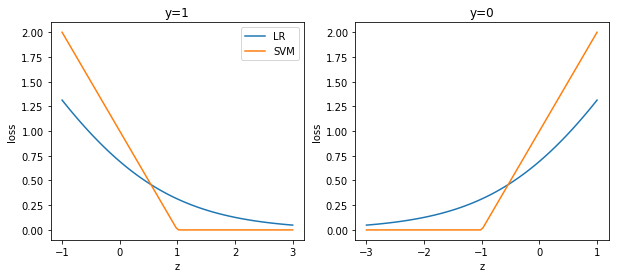

In [23]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z1 = np.linspace(-1,3,100)
y1_lr = -np.log(sigmoid(z1))
y1_svm = np.maximum(1-z1,0)

z0 = np.linspace(-3,1,100)
y0_lr = -np.log(1-sigmoid(z0))
y0_svm = np.maximum(1+z0,0)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(z1,y1_lr)
plt.plot(z1,y1_svm)

plt.title('y=1')
plt.xlabel('z')
plt.ylabel('loss')
plt.legend(('LR','SVM'))
plt.subplot(1,2,2)
plt.plot(z0,y0_lr)
plt.plot(z0,y0_svm)
plt.title('y=0')
plt.xlabel('z')
plt.ylabel('loss')
plt.show()

The trick to calculate the gradient of function *MAX* is to use logical operation (details are below in the code section). For example, the gradient of MAX(0,1-z) is -[(1-z)>0] (note the minus sign!).

Now, let us implement the support vector machine using gradient descent from scratch.

In [56]:
def svm_model(X,y,learning_rate=0.01,iteration_num=100,print_cost_interval=10):
    
    m,n_theta = X.shape
    np.random.seed(2)
    theta = np.random.randn(n_theta,1)
    intercept = 0
    
    for i in range(iteration_num):
        z = np.dot(X,theta) + intercept
        cost1 = (1-z)>0
        cost1 = -1*cost1
        cost2 = (1+z)>0
        cost2 = 1*cost2
        
        dz = y*cost1 + (1-y)*cost2
        
        grad_theta = 1/m*np.dot(X.T,dz)
        grad_intercept = np.mean(dz)
        
        # update
        theta = theta - learning_rate*grad_theta
        intercept = intercept - learning_rate*grad_intercept
        
        cost = np.mean(y*np.maximum(1-z,0) + (1-y)*np.maximum(1+z,0))
        
        
        if i%print_cost_interval == 0:
            print('cost after {} iterations: {}'.format(i,cost))
    
    return theta,intercept

Then we use our code to solve a simple binary classification problem and compare the results with sklearn.

In [34]:
X,y =make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                         n_classes=2, n_clusters_per_class=1,
                         random_state=20)

Y = y[:,np.newaxis]

cost after 0 iterations: 1.056808623872992
cost after 100 iterations: 0.18567712138612605
cost after 200 iterations: 0.15914405387148
cost after 300 iterations: 0.15271601798149212
cost after 400 iterations: 0.14899052922340847
cost after 500 iterations: 0.1484069697910537
cost after 600 iterations: 0.1481732317852736
cost after 700 iterations: 0.1479436300516243
cost after 800 iterations: 0.1477106721818287
cost after 900 iterations: 0.14748031047150537


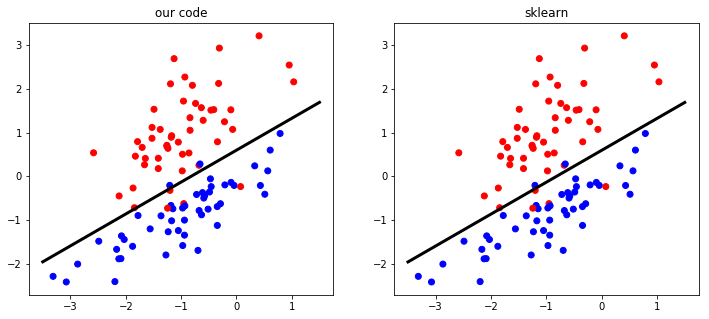

In [66]:
coef,intercept = svm_model(X,Y,learning_rate=0.1,iteration_num=1000,print_cost_interval=100)
b1 = np.linspace(-3.5,1.5,100)
b2 = -(intercept + coef[0]*b1)/coef[1]

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.plot(b1,b2,'k-',linewidth=3)
plt.title('our code')


classifier = SVC(C=100000, kernel='linear', degree=1, coef0=0)
classifier.fit(X,y)
b1 = np.linspace(-3.5,1.5,100)
b2 = -(classifier.intercept_ + classifier.coef_[0,0]*b1)/classifier.coef_[0,1]

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.get_cmap('bwr'))
plt.plot(b1,b2,'k-',linewidth=3)
plt.title('sklearn')
plt.show()

### Kernel tricks
$z=Ax+b$ is the linear kernel. SVM can model more complex problems using other types of kernerls. Go [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see other kernels SVM supports.

*Not sure about this: we can also use different kernels in logistic regression, but no one use them in practice because SVM just performs better.*

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


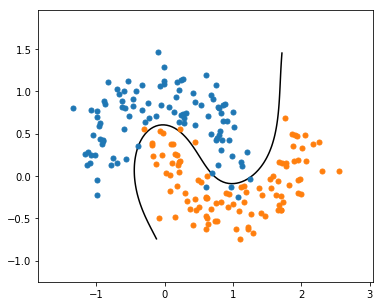

In [197]:
X,y = make_moons(n_samples=200,noise=0.2,random_state=10)

X1 = X[:,0];
X2 = X[:,1];
idx1 = y==1
idx0 = y==0
    
clf = SVC(kernel='rbf',C=100, max_iter=1e6)
# rbf is gaussian kernel
clf.fit(X,y)

# numerical decision boundary / region using predict
x1_test = np.linspace(X1.min(),X1.max(),100)
x2_test = np.linspace(X2.min(),X2.max(),100)

X1_test,X2_test = np.meshgrid(x1_test,x2_test)
X_test = np.hstack((X1_test.flatten().reshape(-1,1),X2_test.flatten().reshape(-1,1)))

p_test = clf.decision_function(X_test)
P_test = p_test.reshape(X1_test.shape)


plt.figure(figsize=(6,5))
plt.contour(X1_test,X2_test,P_test,0,colors='k')
plt.plot(X1[idx0],X2[idx0],'.',markersize=10)
plt.plot(X1[idx1],X2[idx1],'.',markersize=10)
plt.xlim((np.min(X1)-0.5,np.max(X1)+0.5))
plt.ylim((np.min(X2)-0.5,np.max(X2)+0.5))
plt.show()